In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# 1) Cargar datos de usuarios con ruta absoluta
members = pd.read_csv("C:/Users/josen/Documents/MASTER/TFM/Datasets/members.csv")

In [4]:
# 2) Seleccionar características para clustering
X = members[['Age','Gender','BMI','Fat_Percentage','Frequency','Level']].copy()

In [5]:
# 3) Codificar variables categóricas
le_g = LabelEncoder()
X['Gender'] = le_g.fit_transform(X['Gender'])
le_l = LabelEncoder()
X['Level']  = le_l.fit_transform(X['Level'])

In [6]:
# 4) Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# 5) Entrenar K-Means con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
members['cluster'] = kmeans.fit_predict(X_scaled)

In [8]:
# 6) Mostrar el tamaño de cada cluster
cluster_counts = members['cluster'].value_counts().sort_index()
print("Tamaño de cada clúster:")
print(cluster_counts)

Tamaño de cada clúster:
cluster
0    191
1    371
2    154
3    123
4    134
Name: count, dtype: int64


In [9]:
# 7) Reducir dimensionalidad a 2D para visualizar
pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled)

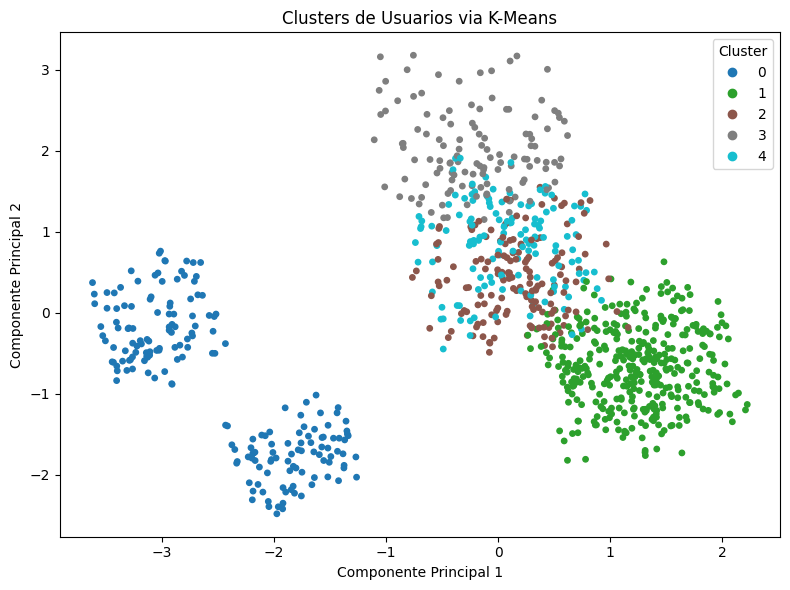

In [10]:
# 8) Gráfico de dispersión de usuarios por clusters
plt.figure(figsize=(8,6))
scatter = plt.scatter(coords[:,0], coords[:,1], c=members['cluster'], s=15, cmap='tab10')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de Usuarios via K-Means')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()